In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = np.arange(1,6)
a_standardised = (a - a.mean()) / a.std()
print(a, a_standardised)

[1 2 3 4 5] [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train.shape

(112, 4)

In [4]:
print('mean:', X_train.mean(axis=0))
print('std:', X_train.std(axis=0))

mean: [5.88660714 3.05178571 3.79642857 1.22321429]
std: [0.86741565 0.43424445 1.79264014 0.77793019]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(X_train) # computes the statistics. Always do this on train

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaler.mean_

array([5.88660714, 3.05178571, 3.79642857, 1.22321429])

In [8]:
X_train_scaled = scaler.transform(X_train) # Applying the statistics from .fit

In [9]:
X_train_scaled[:5]

array([[ 0.01543995, -0.11925475,  0.22512685,  0.35579762],
       [-0.09984503, -1.04039491,  0.11355956, -0.02984109],
       [ 1.05300481, -0.11925475,  0.95031423,  1.12707506],
       [-1.36797986,  0.34131533, -1.39259884, -1.31530348],
       [ 1.1682898 ,  0.11103029,  0.72717965,  1.38416753]])

In [10]:
print('mean:', X_train_scaled.mean(axis=0)) # centered to 0
print('std:', X_train_scaled.std(axis=0)) # std = 1

mean: [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16]
std: [1. 1. 1. 1.]


In [11]:
X_test_scaled = scaler.transform(X_test) # Applying the same statistics as for X_train

In [12]:
X_test_scaled.mean(axis=0)

array([-0.19692712,  0.05042896, -0.08461917, -0.12117658])

### Principal component analysis  
Dimensionality reduction

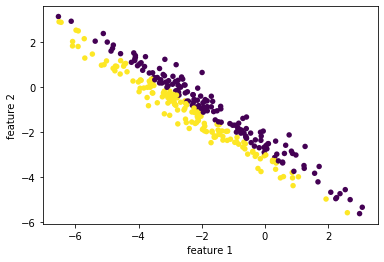

In [13]:
# creating two clusters of data
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
pca.fit(X_blob)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

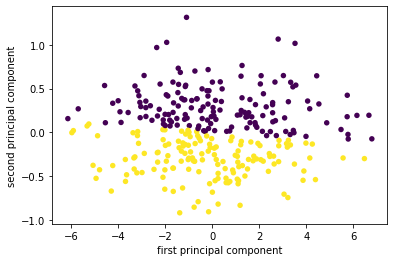

In [16]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[0:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel('first principal component')
plt.ylabel('second principal component');

The second principal axis can be used singularly to split the data

In [17]:
pca = PCA(n_components=1).fit(X_blob) # number of components to keep

In [18]:
X_blob.shape

(300, 2)

In [19]:
pca.transform(X_blob).shape

(300, 1)

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
iris.data.shape

(150, 4)

In [22]:
pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)
iris_pca.shape

(150, 2)

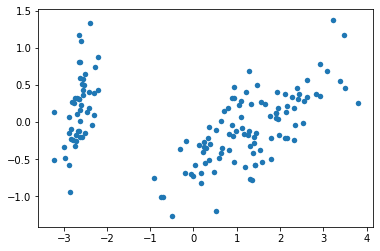

In [23]:
plt.scatter(iris_pca[:, 0], iris_pca[:,1], linewidths=0, s=30 );

In [24]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

pc's are linear combinations of all the features

## Clustering

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

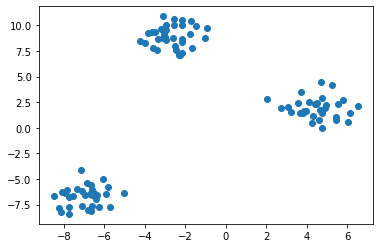

In [27]:
plt.scatter(X[:, 0], X[:, 1]);

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [29]:
labels = kmeans.fit_predict(X)
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

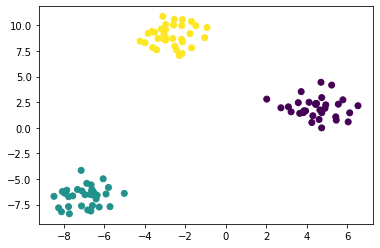

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [31]:
np.all(y == labels)

False

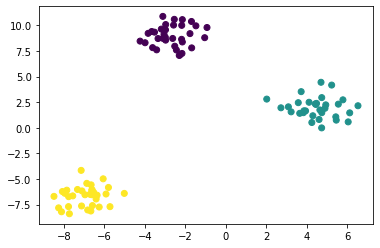

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Clustering does not know about the original labels so, the clusters are labeled differently to how you might expect from the labels.  
This will have an affect on classification metrics which rely on comparing model predictions to original labels.  
Instead, adjusted_rand_score looks at pairs of data points in y and checks how often the pairs are kept together in labels.

In [33]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

Kmeans requires the number of clusters to be given rather that the model choosing the amount. This can be problematic if the number of clusters is unknown. The Elbow Method is a rule of thumb to determine the correct number of clusters:

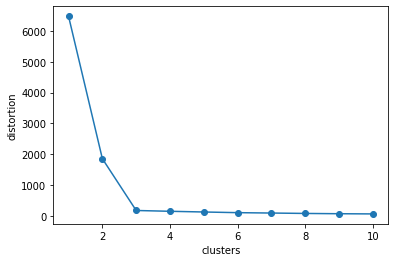

In [34]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('clusters')
plt.ylabel('distortion')
plt.show()

Pick the cluster at the pit of the elbow so, in this case, 3.  

Kmeans will generally fail for non-spherical, anisotropic data.  
SpectralClustering, AgglomerativeClustering and DBSCAN do a better job with nested data, for example.

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()

In [36]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

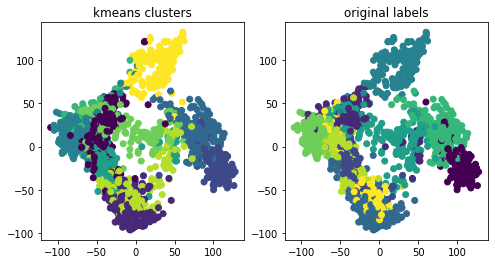

In [43]:
from sklearn.manifold import Isomap # essentially a pca
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target)
ax[0].title.set_text('kmeans clusters')
ax[1].title.set_text('original labels');

In [40]:
adjusted_rand_score(digits.target, clusters)

0.6609614973684527